In [79]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [81]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [82]:
df.shape

(5572, 5)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [84]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
375,ham,Can you say what happen,NaN,NaN,NaN
5259,ham,Can help u swoop by picking u up from wherever...,NaN,NaN,NaN
115,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
4440,ham,I'm going 2 orchard now laready me reaching so...,NaN,NaN,NaN
3001,ham,"Excellent, I'll see what riley's plans are",NaN,NaN,NaN


In [85]:
df.rename(columns={'v1':'Target','v2':'text'}, inplace=True)

df.sample(5)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2048,ham,So dont use hook up any how,NaN,NaN,NaN
2500,ham,Remember to ask alex about his pizza,NaN,NaN,NaN
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
700,ham,How much r Ì_ willing to pay?,NaN,NaN,NaN
373,ham,I cant keep talking to people if am not sure i...,NaN,NaN,NaN


In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [87]:
df['Target'] = encoder.fit_transform(df['Target'])

df.head(4)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [88]:
df.isnull().sum()

Target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [89]:
df.duplicated().sum()

403

In [90]:
df = df.drop_duplicates(keep='first')

df.duplicated().sum()

0

In [91]:
df.head(5)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [92]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

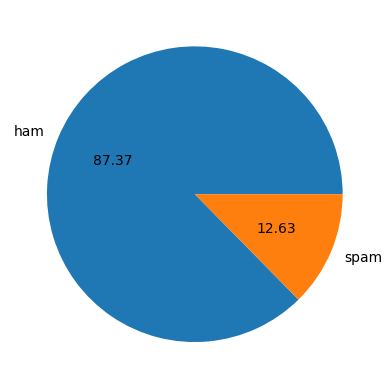

In [93]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [94]:
!pip install nltk

import nltk

In [95]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [97]:
df['num_characters'] = df['text'].apply(len)

df.head(5)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [98]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [99]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head(5)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [100]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(5)

,Target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,15


In [101]:
df[['num_characters', 'num_words', 'num_sentences']].describe( )

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,18.455794
std,58.236293,13.324758,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


<Axes: xlabel='num_characters', ylabel='Count'>

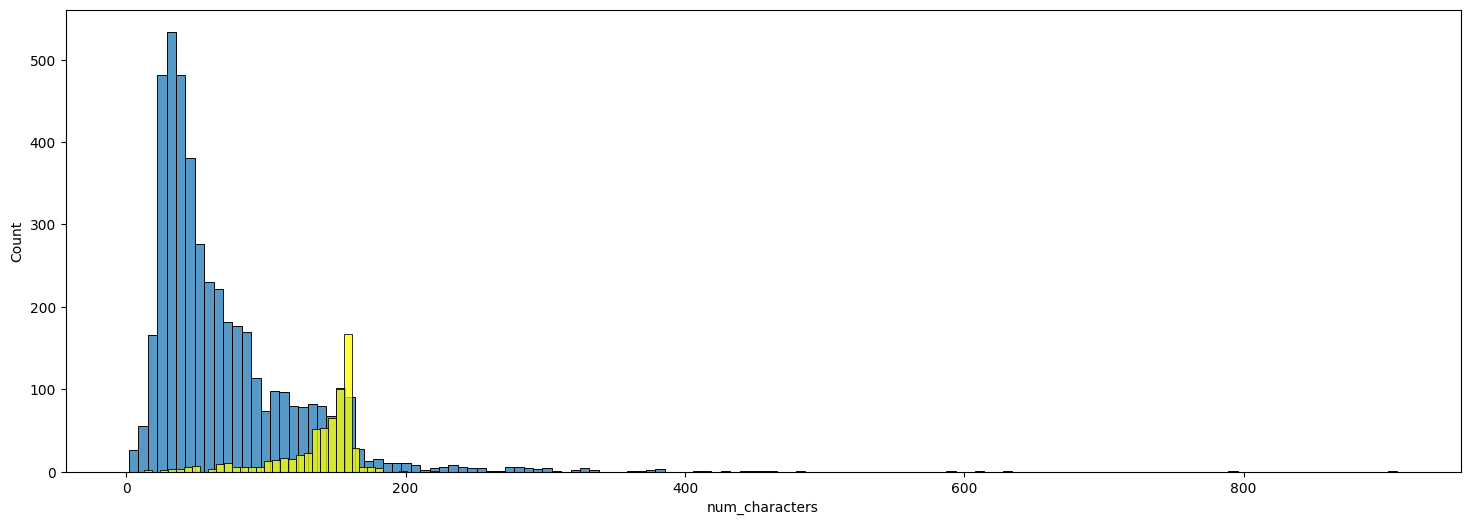

In [102]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color="yellow")

<Axes: xlabel='num_sentences', ylabel='Count'>

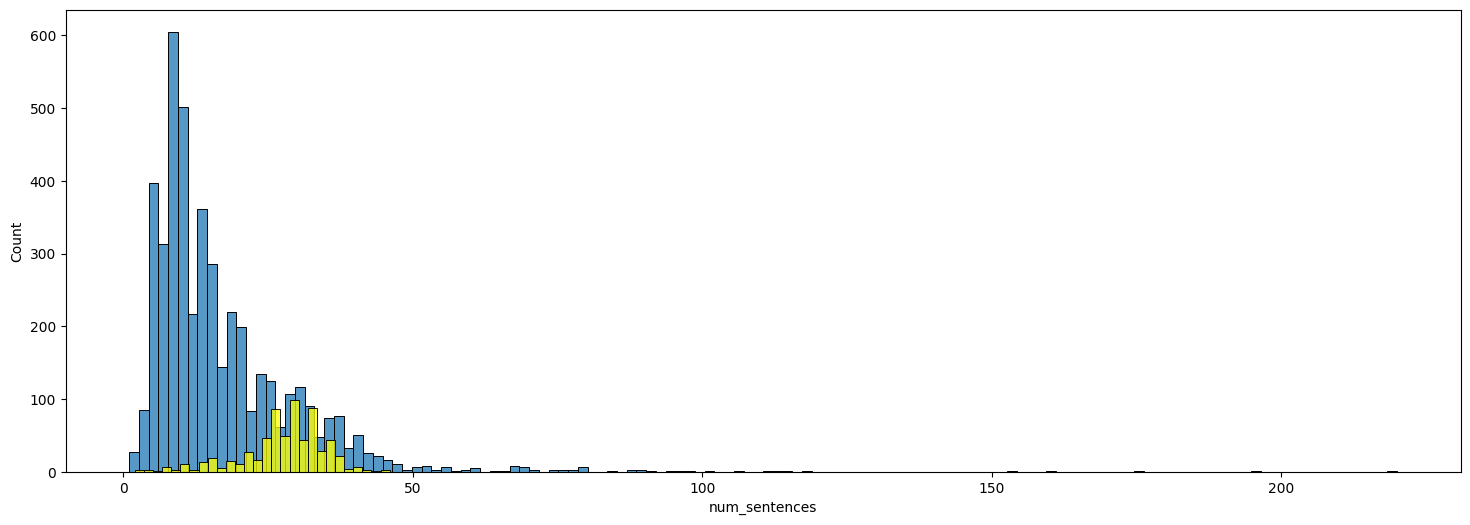

In [103]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color="yellow")

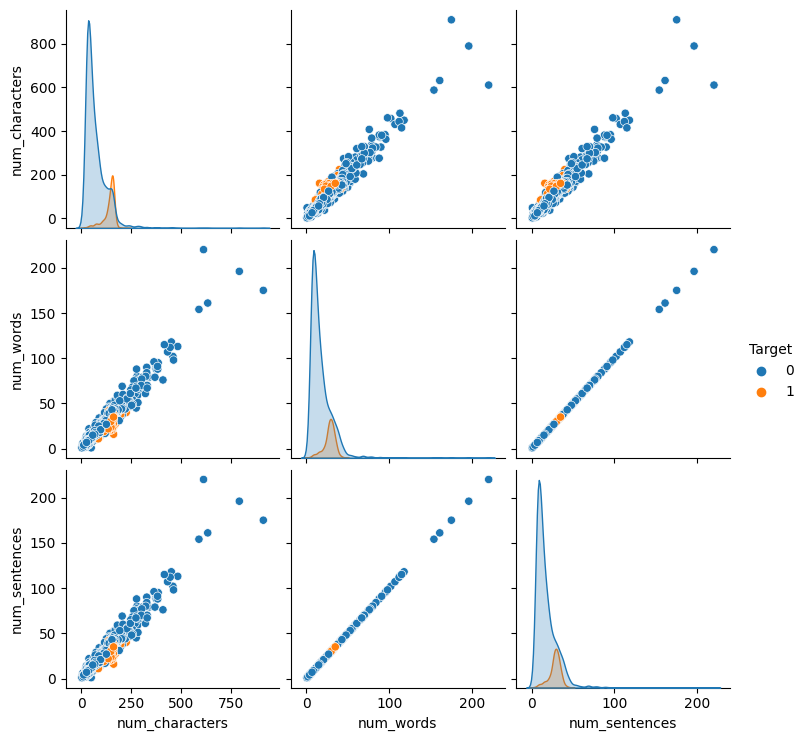

In [104]:
sns.pairplot(df, hue='Target')

In [105]:
df.corr()

<ipython-input-105-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.262912
num_characters,0.384717,1.000000,0.965760,0.965760
num_words,0.262912,0.965760,1.000000,1.000000
num_sentences,0.262912,0.965760,1.000000,1.000000


In [106]:
def transform_text1(text1):
    text1 = text1.lower()
    return text1


In [107]:
transform_text1('HI how are You')

'hi how are you'

In [108]:
def transform_text2(text2):
    text2 = nltk.word_tokenize(text2)
    return text2


In [109]:
transform_text2('HI how are You')

['HI', 'how', 'are', 'You']

In [110]:
def transform_text3(text3):
    a = []
    for i in text3:
        if i.isalnum():
          a.append(i)
    return a


In [111]:
transform_text3('HI how are You % @ 29 44')

['H', 'I', 'h', 'o', 'w', 'a', 'r', 'e', 'Y', 'o', 'u', '2', '9', '4', '4']

In [112]:
def transform_text4(text4):
    text4 = text4.lower()
    text4 = nltk.word_tokenize(text4)
    b = []
    for i in text4:
        if i.isalnum():
          b .append(i)
    return b


In [113]:
transform_text4('HI how are You % @ 29 44 and')

['hi', 'how', 'are', 'you', '29', '44', 'and']

In [115]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [116]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
def transform_text5(text5):
    text5 = text5.lower()
    text5 = nltk.word_tokenize(text5)

    c = []
    for i in text5:
        if i.isalnum():
          c.append(i)
    text5 = c[:]
    c.clear()

    for i in text5:
      if i not in stopwords.words('english') and  i not in string.punctuation:
        c.append(i)
    return c


In [118]:
transform_text5('HI how are You % @ 29 44 and')

['hi', '29', '44']

In [130]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [131]:
def transform_text6(text6):
    text6 = text6.lower()
    text6 = nltk.word_tokenize(text6)

    d = []
    for i in text6:
        if i.isalnum():
          d.append(i)
    text6 = d[:]
    d.clear()
    for i in text6:
      if i not in stopwords.words('english') and  i not in string.punctuation:
        d.append(i)
    text6 = d[:]
    d.clear()
    for i in text6:
      d.append(ps.stem(i))
    return "".join(d)


In [132]:
transform_text6('HI how are You. how did you do?')

'hi'

In [134]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    o = []
    for i in text:
        if i.isalnum():
          o.append(i)
    text = o[:]
    o.clear()
    for i in text:
      if i not in stopwords.words('english') and  i not in string.punctuation:
        o.append(i)
    text = o[:]
    o.clear()
    for i in text:
      o.append(ps.stem(i))
    return "".join(o)


In [136]:
df['Transformed_Text'] = df['text'].apply(transform_text)
df.head(5)

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [139]:
x = cv.fit_transform(df['Transformed_Text']).toarray()

In [140]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [141]:
y = df['Target'].values

In [145]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [143]:
from sklearn.model_selection import train_test_split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [155]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(x_train, y_train)

y_pred_gnb = gnb.predict(x_test)

print(accuracy_score(y_test,y_pred_gnb))

print(confusion_matrix(y_test,y_pred_gnb))

print(precision_score(y_test,y_pred_gnb))

0.14603481624758222
[[ 13 883]
 [  0 138]]
0.13516160626836435


In [156]:
bnb.fit(x_train, y_train)

y_pred_bnb = bnb.predict(x_test)

print(accuracy_score(y_test,y_pred_bnb))

print(confusion_matrix(y_test,y_pred_bnb))

print(precision_score(y_test,y_pred_bnb))

0.8665377176015474
[[896   0]
 [138   0]]
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
